# Personal Key Indicators of Heart Disease

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.shape

(319795, 18)

In [7]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# Removing outliers from the numerical variables

In [8]:
# removing outliers for BMI

dfz = df.copy()
dfz.shape

(319795, 18)

In [9]:
import scipy.stats as stats

In [10]:
dfz["zscore_bmi"] = np.abs(stats.zscore(dfz["BMI"]))
dfz.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,zscore_bmi
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,1.84475


In [11]:
z_outliers = dfz.loc[dfz["zscore_bmi"] > 3].index
print(z_outliers)

Int64Index([   105,    229,    254,    277,    504,    543,    551,    561,
               622,    686,
            ...
            319019, 319140, 319194, 319292, 319543, 319586, 319590, 319636,
            319709, 319725],
           dtype='int64', length=4081)


In [12]:
dfz = dfz.drop(z_outliers)
dfz.shape

(315714, 19)

In [13]:
dfz = dfz.reset_index(drop = True)

In [14]:
# removing outliers from SleepTime

dfz["zscore_SleepTime"] = np.abs(stats.zscore(dfz["SleepTime"]))
z_outliers = dfz.loc[dfz["zscore_SleepTime"] > 3].index
dfz = dfz.drop(z_outliers)
dfz = dfz.reset_index(drop = True)
dfz.shape

(311288, 20)

# Exploring each variables with Frequencies

In [15]:
dfz["HeartDisease"].value_counts()

No     285140
Yes     26148
Name: HeartDisease, dtype: int64

In [16]:
dfz["BMI"].mean()

27.99391418878884

In [17]:
dfz["BMI"].median()

27.26

In [18]:
dfz["Smoking"].value_counts()

No     183347
Yes    127941
Name: Smoking, dtype: int64

In [19]:
dfz["AlcoholDrinking"].value_counts()

No     289938
Yes     21350
Name: AlcoholDrinking, dtype: int64

In [20]:
dfz["Stroke"].value_counts()

No     299865
Yes     11423
Name: Stroke, dtype: int64

In [21]:
dfz["PhysicalHealth"].median() # need to drop the colunm (no meaning of physical health as most of them are 0

0.0

In [22]:
dfz.drop(columns = "PhysicalHealth", inplace = True)

In [23]:
dfz["MentalHealth"].median() # need to drop the colunm (no meaning of mental health as most of them are 0

0.0

In [24]:
dfz.drop(columns = "MentalHealth", inplace = True)

In [25]:
dfz["DiffWalking"].value_counts()

No     270348
Yes     40940
Name: DiffWalking, dtype: int64

In [26]:
dfz["Sex"].value_counts()

Female    162784
Male      148504
Name: Sex, dtype: int64

In [27]:
dfz["AgeCategory"].value_counts() # need to reduce the category (at most four cat)

65-69          33331
60-64          32767
70-74          30395
55-59          28886
50-54          24628
80 or older    23484
45-49          21052
75-79          20980
18-24          20662
40-44          20364
35-39          19950
30-34          18241
25-29          16548
Name: AgeCategory, dtype: int64

In [28]:
dfz["AgeCategory"].replace(["18-24", "25-29", "30-34", "35-39"], ["18-39", "18-39", "18-39", "18-39"], inplace = True)

In [29]:

dfz["AgeCategory"].replace(["40-44", "45-49", "50-54", "55-59"], ["40-59", "40-59", "40-59", "40-59"], inplace = True)
dfz["AgeCategory"].replace(["60-64", "65-69", "70-74", "75-79"], ["60-79", "60-79", "60-79", "60-79"], inplace = True)

In [30]:
dfz["AgeCategory"].value_counts()

60-79          117473
40-59           94930
18-39           75401
80 or older     23484
Name: AgeCategory, dtype: int64

In [31]:
dfz["Race"].value_counts()

White                             239622
Hispanic                           26627
Black                              21607
Other                              10515
Asian                               7961
American Indian/Alaskan Native      4956
Name: Race, dtype: int64

In [32]:
dfz["Diabetic"].value_counts()

No                         263824
Yes                         38450
No, borderline diabetes      6532
Yes (during pregnancy)       2482
Name: Diabetic, dtype: int64

In [33]:
dfz["PhysicalActivity"].value_counts()

Yes    243284
No      68004
Name: PhysicalActivity, dtype: int64

In [34]:
dfz["GenHealth"].value_counts()

Very good    112286
Good          90282
Excellent     66087
Fair          32553
Poor          10080
Name: GenHealth, dtype: int64

In [35]:
dfz["SleepTime"].mean()

7.063144098069954

In [36]:
dfz["SleepTime"].median()

7.0

In [37]:
dfz["Asthma"].value_counts()

No     270421
Yes     40867
Name: Asthma, dtype: int64

In [38]:
dfz["KidneyDisease"].value_counts()

No     300180
Yes     11108
Name: KidneyDisease, dtype: int64

In [39]:
dfz["SkinCancer"].value_counts()

No     282067
Yes     29221
Name: SkinCancer, dtype: int64

# Relationship of dependent and each independent variables

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

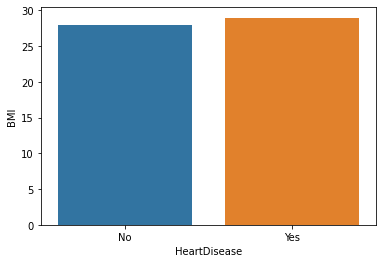

In [40]:
dfz["BMI"].groupby(dfz["HeartDisease"]).mean()

sns.barplot(data = dfz, x = "HeartDisease", y = "BMI", ci = None)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

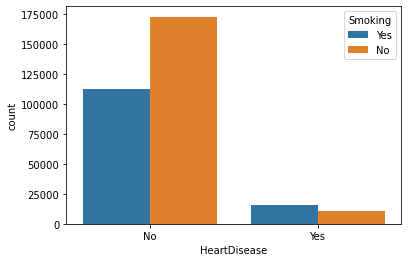

In [41]:
pd.crosstab(dfz["HeartDisease"], dfz["Smoking"], margins = True)

sns.countplot(data = dfz, x = "HeartDisease", hue = "Smoking")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

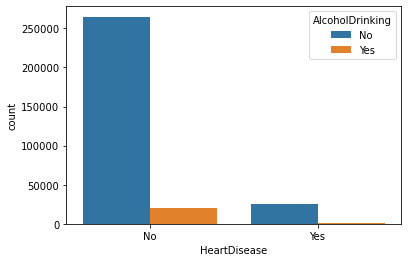

In [42]:
pd.crosstab(dfz["HeartDisease"], dfz["AlcoholDrinking"], margins = True)

sns.countplot(data = dfz, x = "HeartDisease", hue = "AlcoholDrinking")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

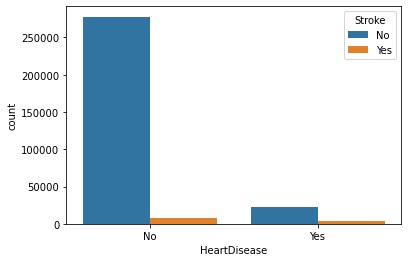

In [43]:
pd.crosstab(dfz["HeartDisease"], dfz["Stroke"], margins = True)

sns.countplot(data = dfz, x = "HeartDisease", hue = "Stroke")

In [44]:
pd.crosstab(dfz["HeartDisease"], dfz["DiffWalking"], margins = True)


DiffWalking,No,Yes,All
HeartDisease,,,
No,253401,31739,285140
Yes,16947,9201,26148
All,270348,40940,311288


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

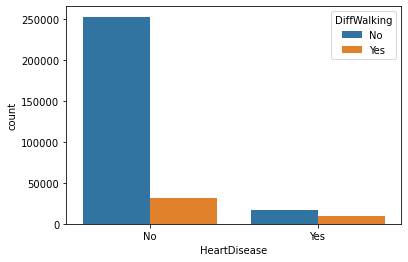

In [45]:
sns.countplot(data = dfz, x = "HeartDisease", hue = "DiffWalking")

In [46]:
pd.crosstab(dfz["HeartDisease"], dfz["Sex"], margins = True)

Sex,Female,Male,All
HeartDisease,,,
No,152180,132960,285140
Yes,10604,15544,26148
All,162784,148504,311288


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

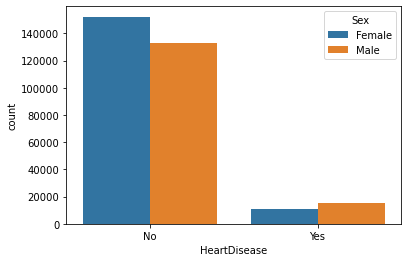

In [47]:
sns.countplot(data = dfz, x = "HeartDisease", hue = "Sex")

In [48]:
pd.crosstab(dfz["HeartDisease"], dfz["AgeCategory"], margins = True)

AgeCategory,18-39,40-59,60-79,80 or older,All
HeartDisease,,,,,
No,74667,90446,101808,18219,285140
Yes,734,4484,15665,5265,26148
All,75401,94930,117473,23484,311288


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

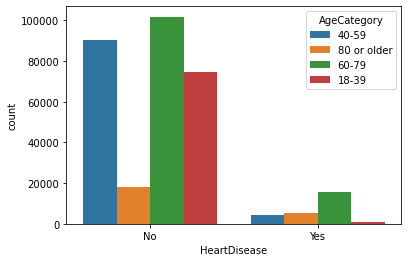

In [49]:
sns.countplot(data = dfz, x = "HeartDisease", hue = "AgeCategory")

In [50]:
pd.crosstab(dfz["HeartDisease"], dfz["Race"], margins = True)

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,All
HeartDisease,,,,,,,
No,4449,7708,20037,25266,9688,217992,285140
Yes,507,253,1570,1361,827,21630,26148
All,4956,7961,21607,26627,10515,239622,311288


In [51]:
pd.crosstab(dfz["HeartDisease"], dfz["Diabetic"], margins = True) # Need to categorize variable into yes and n

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy),All
HeartDisease,,,,,
No,246907,5779,30075,2379,285140
Yes,16917,753,8375,103,26148
All,263824,6532,38450,2482,311288


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

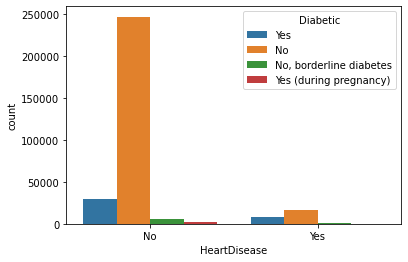

In [52]:
sns.countplot(data = dfz, x = "HeartDisease", hue = "Diabetic")

In [53]:
dfz.replace(["No, borderline diabetes", "Yes (during pregnancy)"], ["No", "Yes"], inplace = True)

In [54]:
pd.crosstab(dfz["HeartDisease"], dfz["Diabetic"], margins = True)

Diabetic,No,Yes,All
HeartDisease,,,
No,252686,32454,285140
Yes,17670,8478,26148
All,270356,40932,311288


In [55]:
pd.crosstab(dfz["HeartDisease"], dfz["PhysicalActivity"], margins = True)

PhysicalActivity,No,Yes,All
HeartDisease,,,
No,58832,226308,285140
Yes,9172,16976,26148
All,68004,243284,311288


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

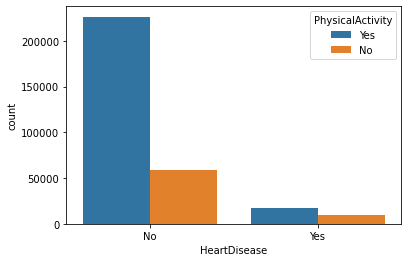

In [56]:
sns.countplot(data = dfz, x = "HeartDisease", hue = "PhysicalActivity")

In [57]:
pd.crosstab(dfz["HeartDisease"], dfz["GenHealth"], margins = True) # not likely

GenHealth,Excellent,Fair,Good,Poor,Very good,All
HeartDisease,,,,,,
No,64627,25869,81018,6634,106992,285140
Yes,1460,6684,9264,3446,5294,26148
All,66087,32553,90282,10080,112286,311288


In [58]:
pd.crosstab(dfz["HeartDisease"], dfz["Asthma"], margins = True) # not likely

Asthma,No,Yes,All
HeartDisease,,,
No,248824,36316,285140
Yes,21597,4551,26148
All,270421,40867,311288


In [59]:
pd.crosstab(dfz["HeartDisease"], dfz["KidneyDisease"], margins = True) # not likely

KidneyDisease,No,Yes,All
HeartDisease,,,
No,277241,7899,285140
Yes,22939,3209,26148
All,300180,11108,311288


In [60]:
pd.crosstab(dfz["HeartDisease"], dfz["SkinCancer"], margins = True) # not likely

SkinCancer,No,Yes,All
HeartDisease,,,
No,260753,24387,285140
Yes,21314,4834,26148
All,282067,29221,311288


In [61]:
dfz["SleepTime"].groupby(dfz["HeartDisease"]).mean() # no difference between the mean so exlclude from the model

HeartDisease
No     7.064400
Yes    7.049449
Name: SleepTime, dtype: float64

In [62]:
dfz.to_csv("heart_disease_updated.csv")

# Performing Logistic regression model |

In [63]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm



In [64]:
dfz.HeartDisease.value_counts()

No     285140
Yes     26148
Name: HeartDisease, dtype: int64

In [65]:
dfz.HeartDisease.replace(["No", "Yes"], [0, 1], inplace = True)
dfz.HeartDisease.value_counts()

0    285140
1     26148
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

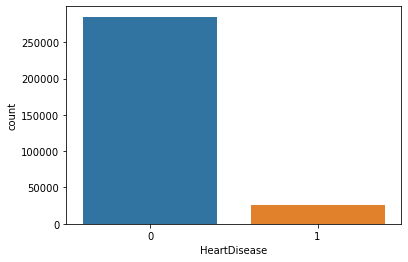

In [66]:
sns.countplot(data = dfz, x = "HeartDisease")

In [89]:
mod = sm.logit("HeartDisease ~ BMI + Smoking + AlcoholDrinking + Sex + AgeCategory + PhysicalActivity", data =dfz).fit()

Optimization terminated successfully.
         Current function value: 0.249075
         Iterations 9


In [90]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               311288
Model:                          Logit   Df Residuals:                   311279
Method:                           MLE   Df Model:                            8
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.1364
Time:                        09:04:27   Log-Likelihood:                -77534.
converged:                       True   LL-Null:                       -89785.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.7790      0.055   -105.818      0.000      -5.886      -5.672
Smoking[T.Yes]                 0.5667      0.014     41.062      0.000       0.540       0.594
AlcoholDrinking[T.Yes]        -0.4517      0.033    -13.637      0.000      -0.517      -0.387
Sex[T.Male]                    0.6175      0.014     44.609      0.000       0.590       0.645
AgeCategory[T.40-59]           1.5112      0.040     37.510      0.000       1.432       1.590
AgeCategory[T.60-79]           2.6421      0.038     69.077      0.000       2.567       2.717
AgeCategory[T.80 or older]     3.3700      0.041     82.670      0.000       3.290       3.450
PhysicalActivity[T.Yes]       -0.4552      0.015    -30.914      0.000      -0.484      -0.426
BMI                            0.0347      0.001     28.320      0.000       0.032       0.037
==============================================================================================
"""

In [91]:
mod.params

Intercept                    -5.778992
Smoking[T.Yes]                0.566712
AlcoholDrinking[T.Yes]       -0.451708
Sex[T.Male]                   0.617475
AgeCategory[T.40-59]          1.511191
AgeCategory[T.60-79]          2.642113
AgeCategory[T.80 or older]    3.370013
PhysicalActivity[T.Yes]      -0.455183
BMI                           0.034674
dtype: float64

In [92]:
dfz_odds = pd.DataFrame(np.exp(mod.params), columns = ['OR'])

In [93]:
dfz_odds["pvalue"] = mod.pvalues

In [94]:
dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

In [73]:
dfz_odds

,OR,pvalue,Sig
Intercept,0.003092,0.000000e+00,Sig
Smoking[T.Yes],1.762462,0.000000e+00,Sig
AlcoholDrinking[T.Yes],0.636540,2.406808e-42,Sig
Sex[T.Male],1.854240,0.000000e+00,Sig
AgeCategory[T.40-59],4.532127,6.324224e-308,Sig
AgeCategory[T.60-79],14.042838,0.000000e+00,Sig
AgeCategory[T.80 or older],29.078911,0.000000e+00,Sig
PhysicalActivity[T.Yes],0.634332,7.722122e-210,Sig
BMI,1.035282,1.988376e-176,Sig


# Intepretation

Compared to non-smoker, smokers are 1.8 times more likely to have heart disease

People who drink alcohol are 0.6 times less likely to have heart disease compared to the one who do not drink

Male are 1.9 times more likely to have heart disease compared to female

People aged 60-79 years are 14 times at risk of having heart disease compared to the people aged 18-39 years

People aged 80 years and above are 29 times at risk of having heart disease compared to the people aged 18-39 years

People who are physically active are less likely (0.6 times) to get heart disease compared to those who are not.

With increase in one unit BMI the odds of developing heart disease increases by 1.03

In [95]:
dfz.shape

(311288, 18)

In [96]:
mod.predict({
    'Smoking': "Yes", 
    'AlcoholDrinking': "Yes", 
    'Sex': "Male", 
    'AgeCategory': '80 or older', 
    'PhysicalActivity': 'No', 
    'BMI': 27})

0    0.32294
dtype: float64

In [86]:
mod.predict({
    'Smoking': "Yes", 
    'AlcoholDrinking': "Yes", 
    'Sex': "Male", 
    'AgeCategory': '60-79', 
    'PhysicalActivity': 'Yes', 
    'BMI': 34})

0    0.119696
dtype: float64

In [85]:
mod = sm.logit("HeartDisease ~ Smoking", data =dfz).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.282763
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               311288
Model:                          Logit   Df Residuals:                   311286
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                 0.01965
Time:                        08:27:47   Log-Likelihood:                -88021.
converged:                       True   LL-Null:                       -89785.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.7678      0.010   -279.448      0.000      -2.787      -2.748
Smoking[T.Yes]     0.7725      0.013     58.853      0.000       0.747       0.798
==================================================================================
"""

In [97]:
dfz.HeartDisease.value_counts()

0    285140
1     26148
Name: HeartDisease, dtype: int64

In [98]:
dfz["Cat_HD"] = dfz["HeartDisease"]

In [99]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311288 entries, 0 to 311287
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      311288 non-null  int64  
 1   BMI               311288 non-null  float64
 2   Smoking           311288 non-null  object 
 3   AlcoholDrinking   311288 non-null  object 
 4   Stroke            311288 non-null  object 
 5   DiffWalking       311288 non-null  object 
 6   Sex               311288 non-null  object 
 7   AgeCategory       311288 non-null  object 
 8   Race              311288 non-null  object 
 9   Diabetic          311288 non-null  object 
 10  PhysicalActivity  311288 non-null  object 
 11  GenHealth         311288 non-null  object 
 12  SleepTime         311288 non-null  float64
 13  Asthma            311288 non-null  object 
 14  KidneyDisease     311288 non-null  object 
 15  SkinCancer        311288 non-null  object 
 16  zscore_bmi        31

In [101]:
dfz["Cat_HD"].replace([0, 1], ["No", "Yes"], inplace = True)
dfz.Cat_HD.value_counts()

No     285140
Yes     26148
Name: Cat_HD, dtype: int64

In [103]:
dfz.to_csv("HD_Updated.csv")

In [104]:
dfz.AlcoholDrinking.value_counts()

No     289938
Yes     21350
Name: AlcoholDrinking, dtype: int64

In [105]:
dfz.Smoking.value_counts()

No     183347
Yes    127941
Name: Smoking, dtype: int64